### Introduction
Recently (12 May), it was reported in local news that the Singapore taxi fleet shrank by approx. a fifth during th last two years, based on government data. 
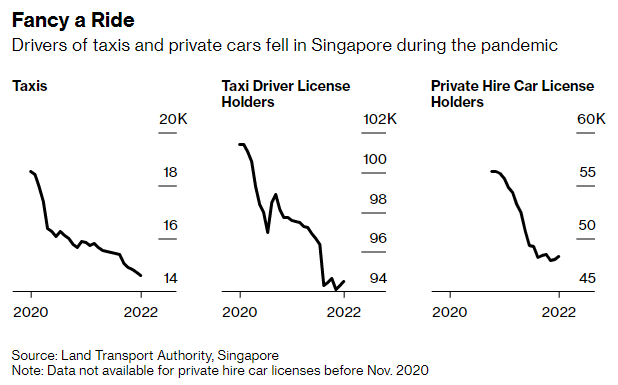
This led to a cascading effects of longer wait times and surging fares as Singapore reopens for business. For example, a S$3 additional surcharge will be implemented from May 19 until June 30 for trips from the Changi airport. 
In Singapore, the taxis are connected to a central system that tracks their positions at all times. We could tap into the data repository @https://data.gov.sg/dataset/taxi-availability for analysis and more. Let's do that.

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import requests
from tqdm.notebook import tqdm

pd.set_option('display.max_columns', None)

The site generates the Request URL based on the input date and time.
For example, 
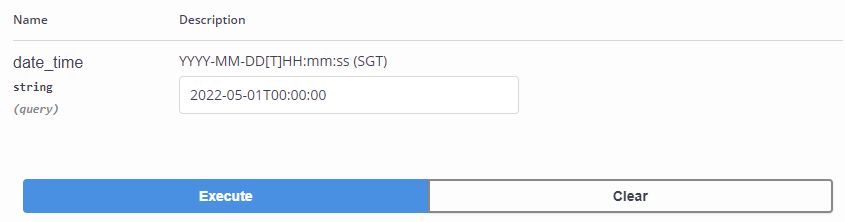 

generates
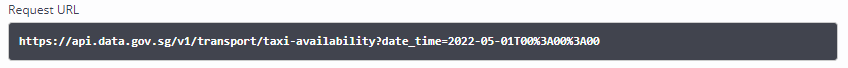

In [18]:
# use the generated url for experiment
proj_url = 'https://api.data.gov.sg/v1/transport/taxi-availability?date_time=2022-05-01T00%3A00%3A00'
# get API call @ proj_url and assign it to proj_res variable
proj_res = requests.get(proj_url)
print(proj_res)

<Response [200]>


In [19]:
# check out the json
proj_json = proj_res.json()
proj_json

{'type': 'FeatureCollection',
 'crs': {'type': 'link',
  'properties': {'href': 'http://spatialreference.org/ref/epsg/4326/ogcwkt/',
   'type': 'ogcwkt'}},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPoint',
    'coordinates': [[103.6228, 1.29],
     [103.63247, 1.296],
     [103.633243283333, 1.31157913333333],
     [103.63712, 1.33247],
     [103.63761, 1.30027],
     [103.64055, 1.34],
     [103.6792, 1.31458],
     [103.68311, 1.34015],
     [103.6865445, 1.34011875],
     [103.68732, 1.32012],
     [103.68858, 1.32257],
     [103.68866, 1.34],
     [103.688738666667, 1.340942],
     [103.689058333333, 1.343215],
     [103.68977, 1.34884],
     [103.69059, 1.34],
     [103.690611333333, 1.34917985],
     [103.69073, 1.34],
     [103.69109, 1.34022],
     [103.692585916667, 1.34610951666667],
     [103.69356, 1.34],
     [103.69427, 1.34262],
     [103.694280166667, 1.3350525],
     [103.6951, 1.34],
     [103.6953, 1.31215],
     [103.696, 1.35],
     [103.69604

### Approach
* The data we are interested in lies in the key value 'features'. We'll access that and convert the json data into a dataframe.
* With the proj_url, we can use a static base url and update the datetime string at the end for repeated get api calls to the data repository.
* On hindsight, let's use April 2022 data since we are at mid-May at time of project.

In [20]:
# date range in 5 minute intervals
daterange = pd.date_range(start='2022-04-01 00:00:00', end='2022-04-30 00:00:00', freq='5T')
daterange

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 00:05:00',
               '2022-04-01 00:10:00', '2022-04-01 00:15:00',
               '2022-04-01 00:20:00', '2022-04-01 00:25:00',
               '2022-04-01 00:30:00', '2022-04-01 00:35:00',
               '2022-04-01 00:40:00', '2022-04-01 00:45:00',
               ...
               '2022-04-29 23:15:00', '2022-04-29 23:20:00',
               '2022-04-29 23:25:00', '2022-04-29 23:30:00',
               '2022-04-29 23:35:00', '2022-04-29 23:40:00',
               '2022-04-29 23:45:00', '2022-04-29 23:50:00',
               '2022-04-29 23:55:00', '2022-04-30 00:00:00'],
              dtype='datetime64[ns]', length=8353, freq='5T')

In [21]:
# data manipulation to s suitable input format for api calls
proj_datelist = [str(ele.date()) +'T' for ele in daterange]
proj_timelist = [str(ele.time()) for ele in daterange]
hour_timelist = [str(ele.split(':')[0]) + '%3A' for ele in proj_timelist]
minsec_timelist = [str(ele.split(':')[1]) + '%3A00' for ele in proj_timelist]
# build the list of concatenated zip list elements 
proj_apilist = [ele1+ele2+ele3 for ele1, ele2, ele3 in zip(proj_datelist,
                                                           hour_timelist,
                                                           minsec_timelist)]
proj_apilist

['2022-04-01T00%3A00%3A00',
 '2022-04-01T00%3A05%3A00',
 '2022-04-01T00%3A10%3A00',
 '2022-04-01T00%3A15%3A00',
 '2022-04-01T00%3A20%3A00',
 '2022-04-01T00%3A25%3A00',
 '2022-04-01T00%3A30%3A00',
 '2022-04-01T00%3A35%3A00',
 '2022-04-01T00%3A40%3A00',
 '2022-04-01T00%3A45%3A00',
 '2022-04-01T00%3A50%3A00',
 '2022-04-01T00%3A55%3A00',
 '2022-04-01T01%3A00%3A00',
 '2022-04-01T01%3A05%3A00',
 '2022-04-01T01%3A10%3A00',
 '2022-04-01T01%3A15%3A00',
 '2022-04-01T01%3A20%3A00',
 '2022-04-01T01%3A25%3A00',
 '2022-04-01T01%3A30%3A00',
 '2022-04-01T01%3A35%3A00',
 '2022-04-01T01%3A40%3A00',
 '2022-04-01T01%3A45%3A00',
 '2022-04-01T01%3A50%3A00',
 '2022-04-01T01%3A55%3A00',
 '2022-04-01T02%3A00%3A00',
 '2022-04-01T02%3A05%3A00',
 '2022-04-01T02%3A10%3A00',
 '2022-04-01T02%3A15%3A00',
 '2022-04-01T02%3A20%3A00',
 '2022-04-01T02%3A25%3A00',
 '2022-04-01T02%3A30%3A00',
 '2022-04-01T02%3A35%3A00',
 '2022-04-01T02%3A40%3A00',
 '2022-04-01T02%3A45%3A00',
 '2022-04-01T02%3A50%3A00',
 '2022-04-01T02%3A55

In [27]:
proj_apilist[-1]

'2022-04-30T00%3A00%3A00'

In [30]:
# make api call
base_url = 'https://api.data.gov.sg/v1/transport/taxi-availability?date_time='
# list to hold the collected dataframes
frame_list = []
# for loop with tqdm to track progress
for Ele in tqdm(proj_apilist):
    projEle_url = base_url + Ele
    projEle_res = requests.get(projEle_url)
    projEle_json = projEle_res.json()
    projEle_jsonFea = projEle_json['features']
    projEle_jsonFea_df = pd.json_normalize(projEle_jsonFea)
    frame_list.append(projEle_jsonFea_df)

  0%|          | 0/8353 [00:00<?, ?it/s]

In [31]:
# consolidate data into dataframe
Dataframes = pd.concat(frame_list)
Dataframes['time'] = daterange
Dataframes.head(1)


,type,geometry.type,geometry.coordinates,properties.timestamp,properties.taxi_count,properties.api_info.status,time
0,Feature,MultiPoint,"[[103.63974, 1.32945], [103.65257, 1.31732], [...",2022-03-31T23:51:53+08:00,2434,healthy,2022-04-01


In [32]:
# export Dataframes to CSV
Dataframes.to_csv('2022Apr.csv')